<a href="https://colab.research.google.com/github/Shradha1304/Ml_projects/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("sales_data_sample.csv", encoding="latin")

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.info()

In [ ]:
df = df[['ORDERLINENUMBER', 'SALES']]

In [ ]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df.values)

In [ ]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit_predict(scaled_values)
    wcss.append(model.inertia_)

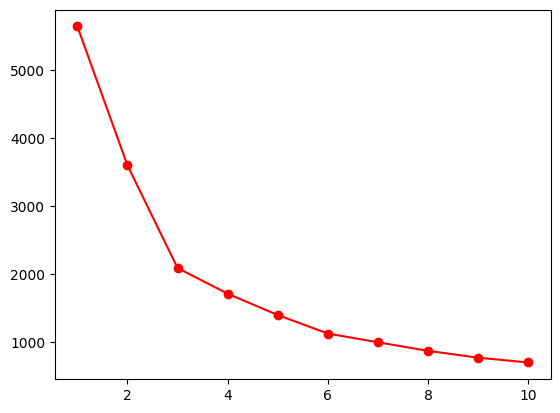

In [ ]:
plt.plot(range(1, 11), wcss, 'ro-')
plt.show()

In [ ]:
model = KMeans(n_clusters=7, init='k-means++')
clusters = model.fit_predict(scaled_values)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 5, 3, ..., 1, 5, 0], dtype=int32)

In [ ]:
df['cluster'] = clusters

In [ ]:
df

,ORDERLINENUMBER,SALES,cluster
0,2,2871.00,5
1,5,2765.90,5
2,2,3884.34,3
3,6,3746.70,3
4,14,5205.27,2
...,...,...,...
2818,15,2244.40,4
2819,1,3978.51,3
2820,4,5417.57,1
2821,1,2116.16,5
